<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/06_uczenie_maszynowe/08_drzewo_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

dane

In [2]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ','_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

In [3]:
print('liczba próbek:', len(data))
print('kształt danych: ', data.shape)
print('nazwy zmiennych objaśniających: ', feature_names)
print('nazwy kategorii kosaćca: ', class_names)

liczba próbek: 150
kształt danych:  (150, 4)
nazwy zmiennych objaśniających:  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
nazwy kategorii kosaćca:  ['setosa' 'versicolor' 'virginica']


Eksploracja danych

In [4]:
#Iris Setosa
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

In [5]:
#Iris Versicolor
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)


In [6]:
#Iris Virginica
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)


In [7]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df.describe().T.apply(lambda x:x.round(2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


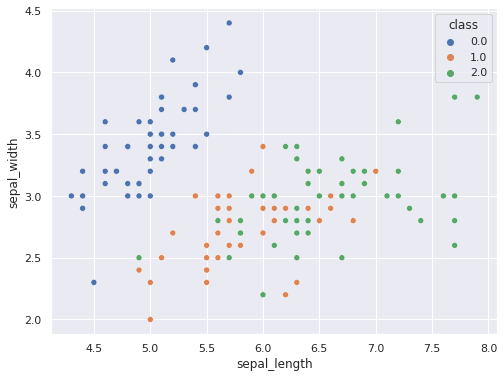

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot('sepal_length', 'sepal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


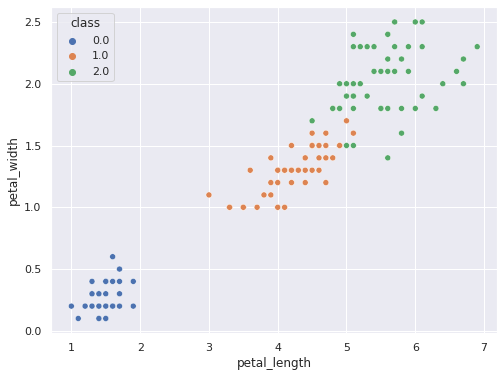

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot('petal_length', 'petal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3]);

In [14]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

przygotowanie danych do modelu

In [15]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [16]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [20]:
X = X.values
y = y.values.astype('int16')

budowa klasyfikatora drzewa decyzyjnego

max_depth = 1

In [21]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

wykreślanie granic decyzyjnych

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


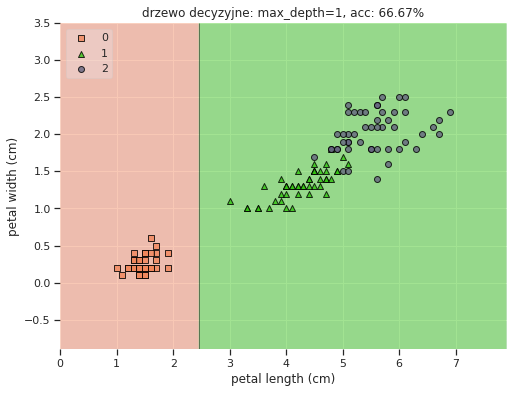

In [23]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X ,y)

plt.figure(figsize=(8,6))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'drzewo decyzyjne: max_depth=1, acc: {acc *100:.2f}%')
plt.show()

In [ ]:
#model ma za zadanie wybrać z całego zbioru dwa najbardziej jednorodne zbiory. Tu podział po petal length

graf drzewa decyzyjnego

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(classifier,
                out_file='iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

wyświetlenie grafu drzewa decyzyjnego

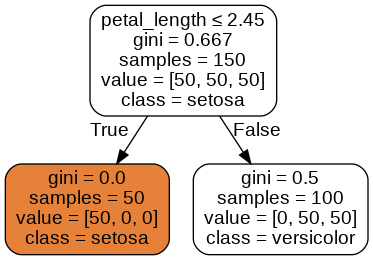

In [25]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[2:],
                class_names=class_names,
                special_characters=True,
                rounded=True,
                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=250)

In [26]:
def make_decision_tree(max_depth=1):
  # trenowanie modelu
  classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
  classifier.fit(X, y)

  #eksport grafu drzewa
  dot_data = StringIO()
  export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[2:],
                class_names=class_names,
                special_characters=True,
                rounded=True,
                filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  #obliczanie dokładności
  acc = classifier.score(X, y)

  #wykreślanie granic decyzyjnych
  colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

  plt.figure(figsize=(8,6))
  plot_decision_regions(X, y, classifier, legend=2, colors=colors)
  plt.xlabel('petal length (cm)')
  plt.ylabel('petal width (cm)')
  plt.title(f'drzewo decyzyjne: max_depth=1, acc: {acc *100:.2f}%')

  return Image(graph.create_png(), width=150 + max_depth * 80)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


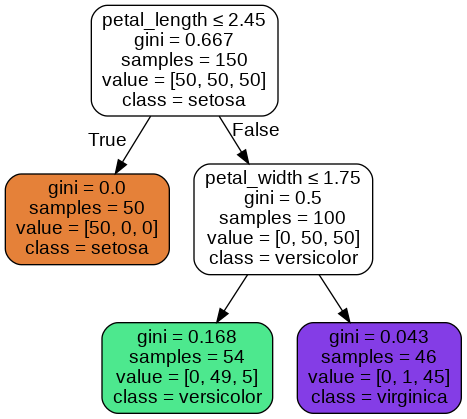

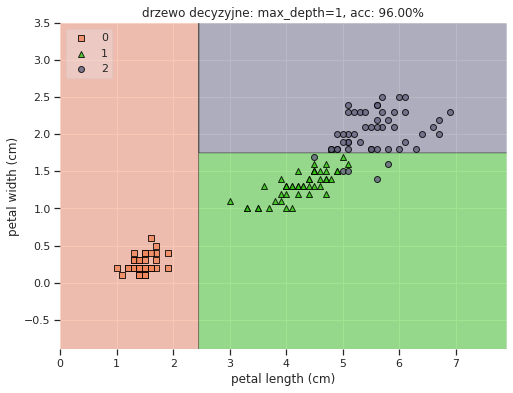

In [27]:
make_decision_tree(max_depth=2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


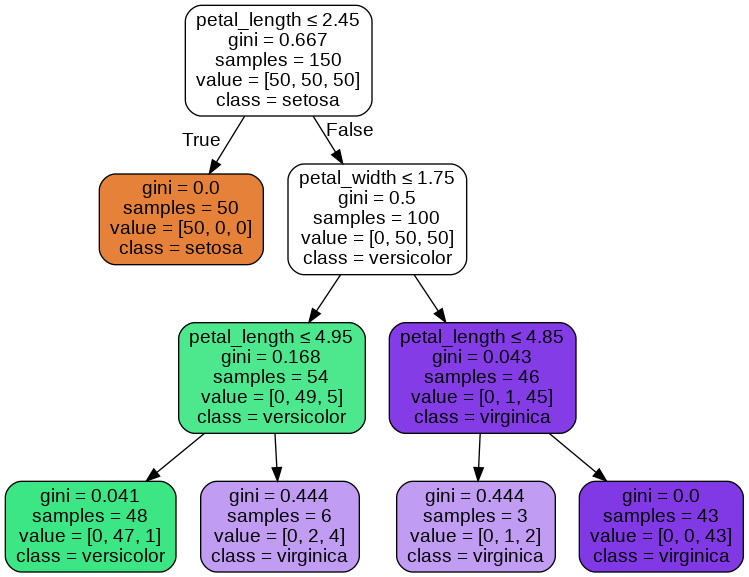

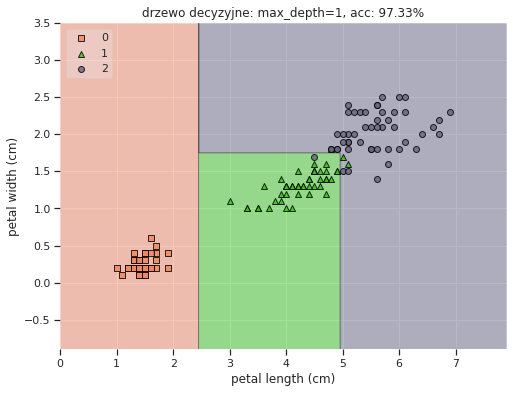

In [28]:
make_decision_tree(max_depth=3)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


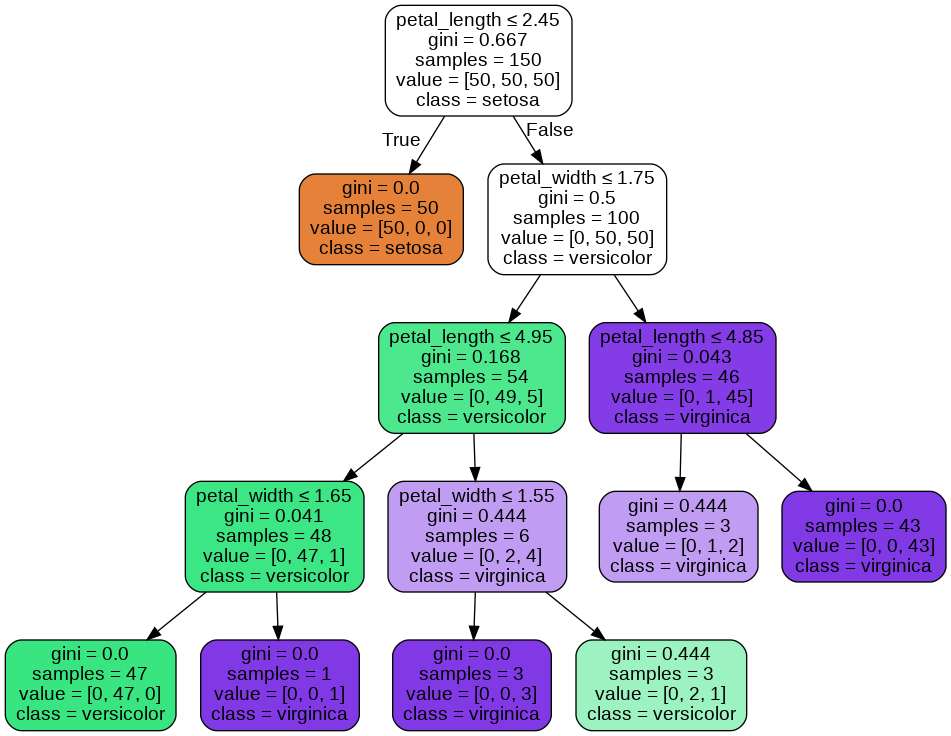

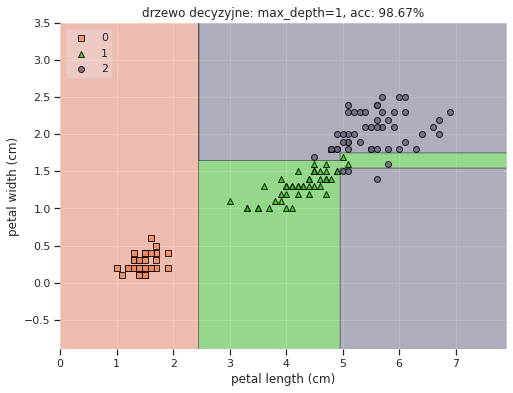

In [29]:
make_decision_tree(max_depth=4)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


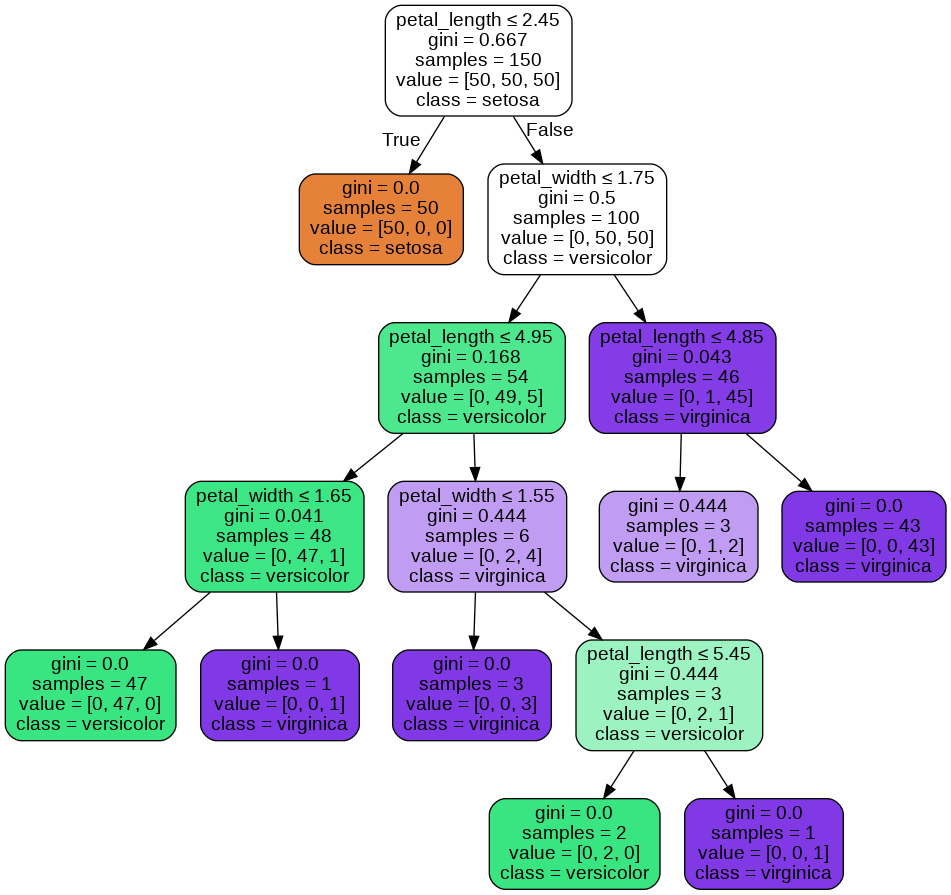

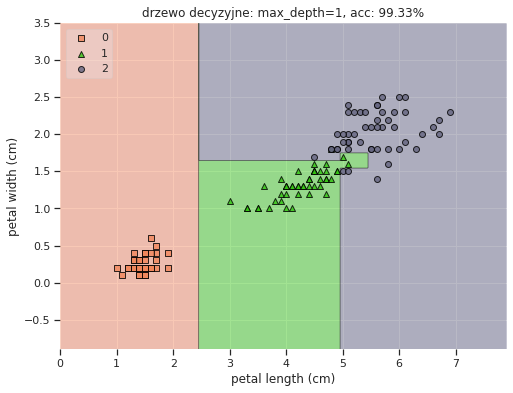

In [30]:
make_decision_tree(max_depth=5)